In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.measure import find_contours
from pydicom import dcmread
import nibabel as nib
import pyvista as pv

In [3]:
basepath = "/mnt/materials/SIRF/MathPlusBerlin/DATA/ACDC-Daten/DCM"
patient = "patient001"
img_path = os.path.join(basepath, patient, "image.nii.gz")
label_path = os.path.join(basepath, patient, "label.nii.gz")

In [4]:
img = nib.load(img_path)
label = nib.load(label_path)

In [5]:
label.shape

(216, 256, 10, 1, 30, 1)

/opt/conda/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


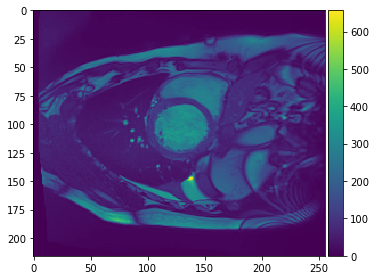

In [6]:
imshow(img.get_fdata()[:, :, 2, 0, 0, 0])

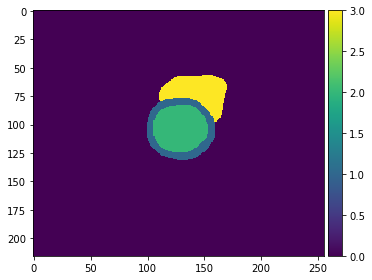

In [7]:
imshow(label.get_fdata()[:, :, 2, 0, 0, 0])

In [8]:
slc = label.get_fdata()[:, :, 2, 0, 0, 0]

### Try with pyvista

For now we decided to use something else since this is for 3d data and plotting crashes the kernel

In [8]:
coords = np.stack(np.nonzero(slc)).astype(float)
coords = np.concatenate((coords, np.zeros((1, coords.shape[1]))))

In [9]:
point_cloud = pv.PolyData(coords.T)

In [1]:
# point_cloud.plot(eye_dome_lighting=True)

### Try scikit image

In [26]:
contours = find_contours(slc > 0)

IndexError: list index out of range

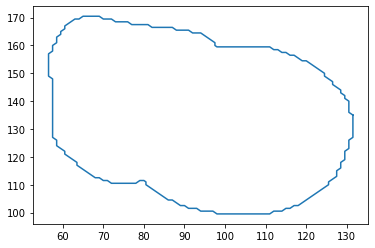

In [27]:
plt.plot(*contours[0].T)
plt.plot(*contours[1].T)

In [20]:
len(contours)

2